# demo02_小汽车分类

In [70]:
import numpy as np
import pandas as pd

In [71]:
data = pd.read_csv('../data/car.txt', header=None)
data.head(3)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [72]:
data[6].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64

1. 需求分析
2. 数据收集、预处理
3. 整理输入输出集
4. 拆分训练、测试集
5. 选择模型、创建模型
6. 验证曲线、学习曲线
7. 训练模型
8. 模型评估、混淆矩阵、分类报告

In [73]:
import sklearn.preprocessing as sp

# 数据收集、预处理
train_data = pd.DataFrame([])
encoders = {}
for k, v in data.items():
    encoder = sp.LabelEncoder()
    train_data[k] = encoder.fit_transform(v)
    encoders[k] = encoder
    
train_data.head(3)

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2


In [81]:
import sklearn.ensemble as se
import sklearn.model_selection as ms

# 整理输入与输出
x, y = train_data.loc[:, :5], train_data[6]
# 创建模型
model = se.RandomForestClassifier(
    max_depth=9, n_estimators=140, random_state=7)
# 交叉验证
s = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
s.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.793472120346457

## 验证曲线，选取最优超参数

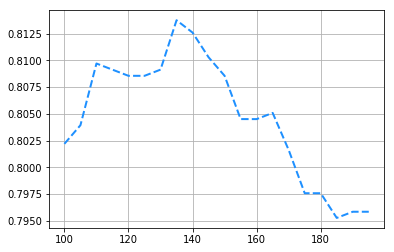

In [85]:
# 验证 n_estimators
params = np.arange(100, 200, 5)
train_scores, test_scores = ms.validation_curve(
    model, x, y, 'n_estimators', params, cv=5)
test_s = test_scores.mean(axis=1)
test_s = pd.Series(test_s, index=params)
test_s.plot(linestyle='--', color='dodgerblue', grid='on',
            linewidth=2)

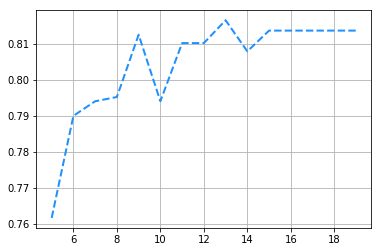

In [84]:
# 验证 max_depth
params = np.arange(5, 20, 1)
train_scores, test_scores = ms.validation_curve(
    model, x, y, 'max_depth', params, cv=5)
test_s = test_scores.mean(axis=1)
test_s = pd.Series(test_s, index=params)
test_s.plot(linestyle='--', color='dodgerblue', grid='on',
            linewidth=2)

## 学习曲线，获取最优训练集大小

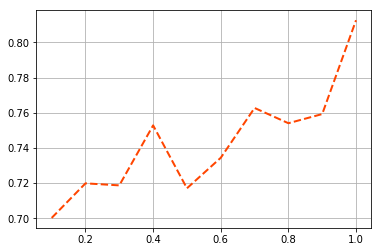

In [87]:
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = \
    ms.learning_curve(model, x, y, train_sizes=params, cv=5)
test_s = test_scores.mean(axis=1)
test_s = pd.Series(test_s, index=params)
test_s.plot(linestyle='--', color='orangered', grid='on',
            linewidth=2)

In [82]:
model.fit(x, y)  # 训练模型
import sklearn.metrics as sm
pred_y = model.predict(x)
print(sm.classification_report(y, pred_y))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       384
          1       1.00      0.75      0.86        69
          2       1.00      1.00      1.00      1210
          3       0.94      1.00      0.97        65

avg / total       0.99      0.99      0.99      1728



In [83]:
# 测试模型
data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
        ['high', 'high', '4', '4', 'med', 'med', 'acc'],
        ['low', 'low', '2', '4', 'small', 'high', 'good'],
        ['low', 'med', '3', '4', 'med', 'high', 'vgood']]
# 针对这些测试数据，做相应的标签编码，应使用已训练过的LabelEncoder()
test_data = pd.DataFrame(data)
for k, v in test_data.items():
    encoder = encoders[k]
    test_data[k] = encoder.transform(v) # 使用旧码表 转换新数据
test_x, test_y = test_data.loc[:, :5], test_data[6]
pred_test_y = model.predict(test_x)
print(encoders[6].inverse_transform(pred_test_y))
print(encoders[6].inverse_transform(test_y.values))

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
